In [1]:
import json
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
results = [json.load(open(f)) for f in glob.glob('2020*/coco_val2017_rcnn_3x_q_[1-9]*.json')]

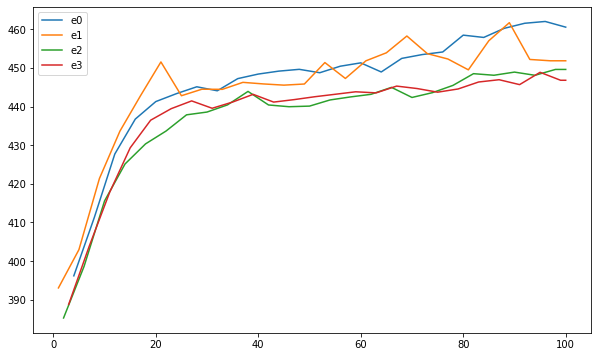

In [3]:
res = pd.Series({r['quality']: r['elapsed'] for r in results}).to_frame(name='elapsed').sort_index()
res['batch'] = res.index % 4
for b in range(4):
    res[f'e{b}'] = np.nan
    res.loc[res.batch == b, f'e{b}'] = res.elapsed
    res[f'e{b}'] = res[f'e{b}'].interpolate()
del res['batch']
del res['elapsed'] # noisy
res.plot();

In [4]:
df = pd.Series({r['quality']: r['bbox']['AP50'] for r in results}, name='AP50').sort_index().to_frame()
df['AP'] = pd.Series({r['quality']: r['bbox']['AP'] for r in results}).sort_index()
df.index.name = 'Q'
df.tail()

,AP50,AP
Q,,
96,54.508723,37.442320
97,54.384174,37.328635
98,54.496822,37.387791
99,54.562688,37.459077
100,54.598016,37.466794


{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

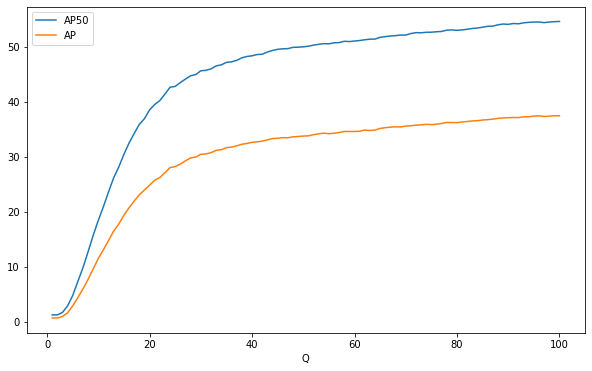

In [5]:
plot = df.plot()
plot.get_figure().canvas.get_supported_filetypes()

In [6]:
fig = plot.get_figure()
fig.set_size_inches(3, 2)
fig.savefig('ap_vs_ap50.pdf')
fig.savefig('ap_vs_ap50.pgf')

In [7]:
from ipywidgets import interact
ddf = df.diff()
@interact(x=(-0.13, 0, 0.01))
def bad_vals(x):
    return ddf[(ddf.AP < x) | (ddf.AP50 < x)].reset_index()

interactive(children=(FloatSlider(value=-0.07, description='x', max=0.0, min=-0.13, step=0.01), Output()), _do…

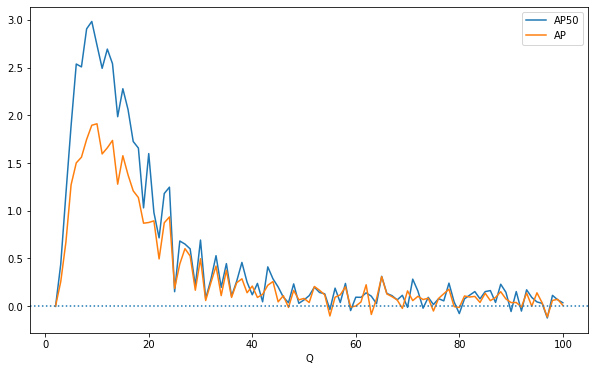

In [8]:
#ddf.columns #= ['d(AP50)', 'd(AP)']
ax = ddf.plot()
ax.axhline(0, ls='dotted')

In [9]:
results_cardio = [json.load(open(f)) for f in glob.glob('../cardio_results/*.json')]

In [10]:
results_cardio[0]

{'quality': 13,
 'bbox': {'AP': 16.39715394162017,
  'AP50': 25.558679327335433,
  'AP75': 17.55302109956631,
  'APs': 7.137492826178159,
  'APm': 18.299760034213723,
  'APl': 23.661680028015503,
  'AP-person': 31.49132392569205,
  'AP-bicycle': 16.01163418117221,
  'AP-car': 23.64115604910474,
  'AP-motorcycle': 24.95802924432409,
  'AP-airplane': 33.98446959053059,
  'AP-bus': 46.456986977601424,
  'AP-train': 46.68798763805713,
  'AP-truck': 18.88936502758891,
  'AP-boat': 10.213508646490972,
  'AP-traffic light': 15.277667953167173,
  'AP-fire hydrant': 44.20125406597143,
  'AP-stop sign': 50.82724575296634,
  'AP-parking meter': 21.921309854306806,
  'AP-bench': 8.2172641366686,
  'AP-bird': 7.781766555865192,
  'AP-cat': 5.4255993099014495,
  'AP-dog': 15.418075409457499,
  'AP-horse': 22.982068942238328,
  'AP-sheep': 10.969683461508165,
  'AP-cow': 13.9097462681531,
  'AP-elephant': 13.720643772681996,
  'AP-bear': 6.752475247524753,
  'AP-zebra': 49.427291199842664,
  'AP-gira

In [11]:
from itertools import groupby
gb = lambda it, key: groupby(sorted(it, key=key), key)

for key, group in gb(results_cardio, lambda x: x['model_config']):
    print(key)

COCO-Detection/faster_rcnn_R_101_C4_3x.yaml
COCO-Detection/faster_rcnn_R_101_DC5_3x.yaml
COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml
COCO-Detection/faster_rcnn_R_50_C4_3x.yaml
COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml
COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml
COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml
COCO-Detection/retinanet_R_101_FPN_3x.yaml
COCO-Detection/retinanet_R_50_FPN_3x.yaml


In [12]:
sum(r['elapsed'] for r in results_cardio)

706458.7822053432

In [13]:
def flatten(value):
    result = value.copy()
    result.update(result['bbox'])
    del result['bbox']
    return result

c_df = pd.DataFrame([flatten(r) for r in results_cardio]).sort_values(['model_config', 'quality'])
c_df.head()

,quality,elapsed,model_config,finished,device,AP,AP50,AP75,APs,APm,...,AP-toaster,AP-sink,AP-refrigerator,AP-book,AP-clock,AP-vase,AP-scissors,AP-teddy bear,AP-hair drier,AP-toothbrush
499,1,2826.581140,COCO-Detection/faster_rcnn_R_101_C4_3x.yaml,2020-06-08 00:41:11,GeForce GTX 1060 6GB,0.689457,1.235953,0.663127,0.225167,0.534131,...,0.0,0.000000,2.042650,0.217822,6.403663,0.000000,0.0,0.0,0.0,0.000000
748,2,1062.615536,COCO-Detection/faster_rcnn_R_101_C4_3x.yaml,2020-06-12 00:47:03,TITAN V,0.690565,1.245658,0.658742,0.216803,0.532380,...,0.0,0.000000,2.302530,0.266620,6.121357,0.000000,0.0,0.0,0.0,0.000000
363,3,1063.541968,COCO-Detection/faster_rcnn_R_101_C4_3x.yaml,2020-06-12 01:05:25,TITAN V,1.070978,1.864981,1.082569,0.395053,1.003314,...,0.0,0.000000,3.763974,0.234323,7.441893,0.000000,0.0,0.0,0.0,0.000000
397,4,1073.869632,COCO-Detection/faster_rcnn_R_101_C4_3x.yaml,2020-06-09 12:17:56,TITAN V,1.767948,2.916960,1.832650,0.488558,1.774429,...,0.0,0.693069,6.506911,0.159798,10.868144,0.594059,0.0,0.0,0.0,0.924092
680,5,1065.755852,COCO-Detection/faster_rcnn_R_101_C4_3x.yaml,2020-06-12 01:23:49,TITAN V,3.114807,5.128690,3.209052,0.771651,3.356956,...,0.0,0.397454,7.800178,0.215507,14.893580,0.313531,0.0,0.0,0.0,0.792079


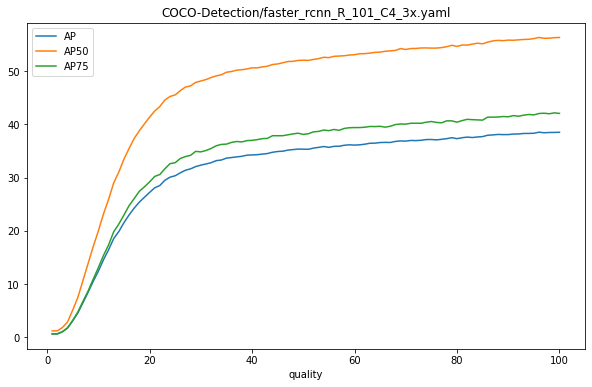

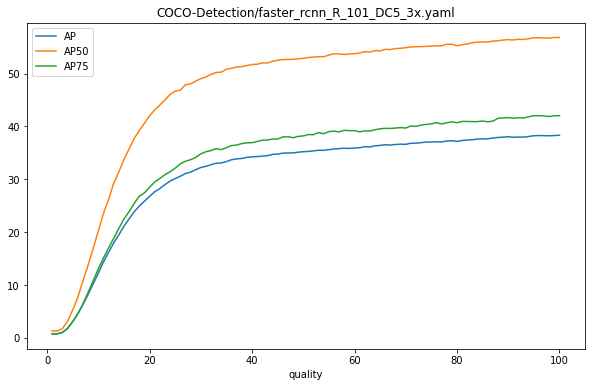

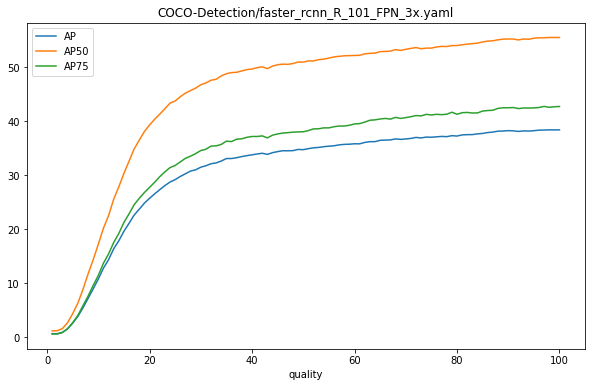

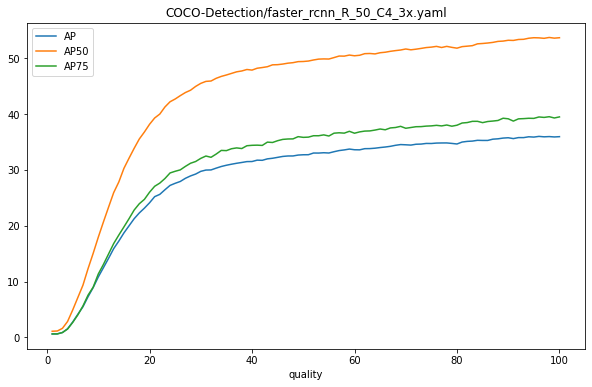

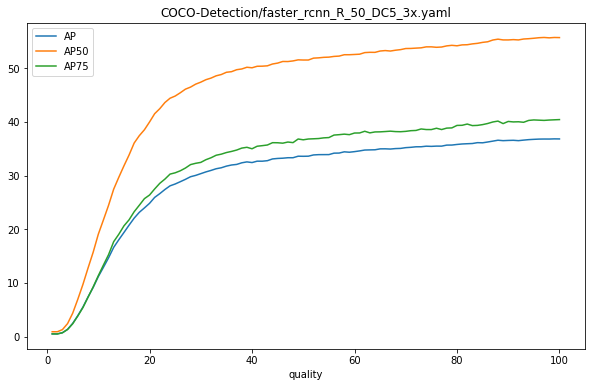

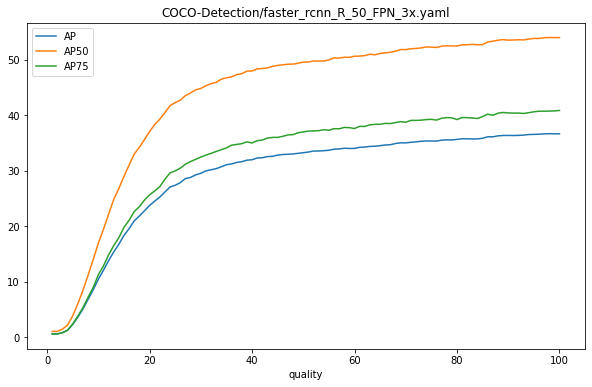

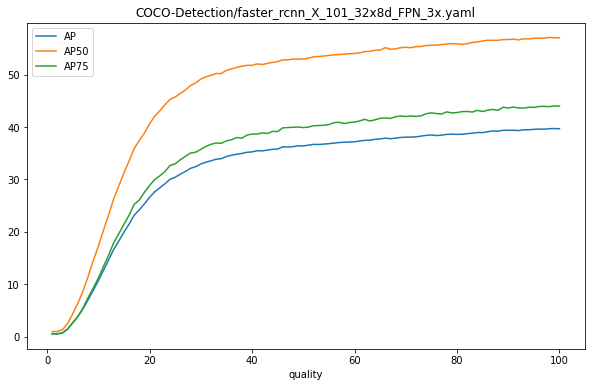

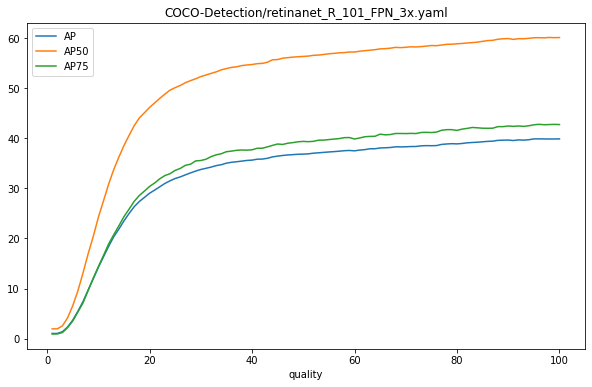

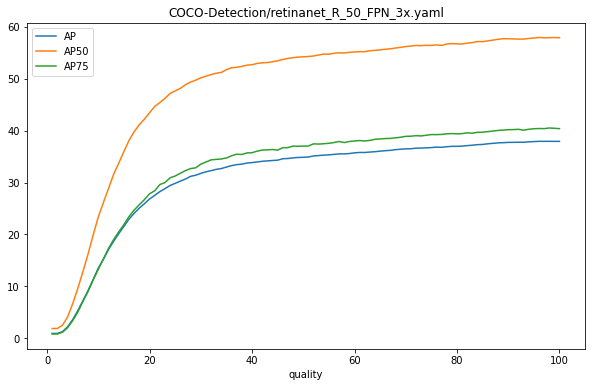

In [14]:
for mc in c_df.model_config.unique():
    ax = c_df[c_df.model_config == mc][['quality', 'AP', 'AP50', 'AP75']].plot(x='quality')
    ax.set_title(mc)

Text(0.5, 1.0, 'AP between models')

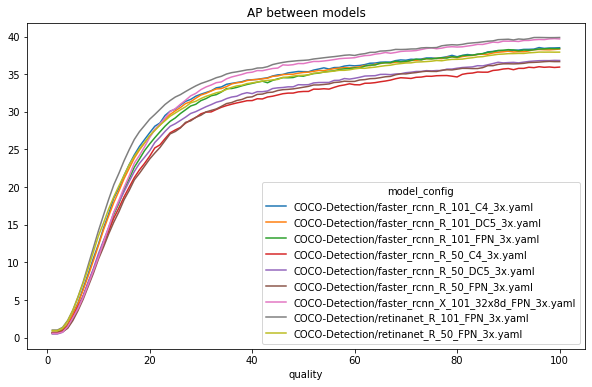

In [15]:
ax = c_df.pivot(index='quality', columns='model_config', values='AP').plot()
ax.set_title('AP between models')

Text(0.5, 1.0, 'AP50 between models')

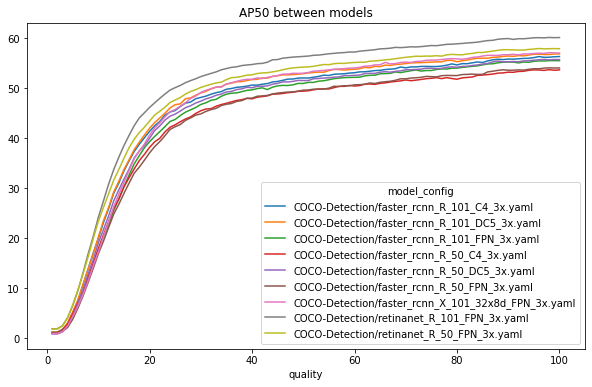

In [16]:
ax = c_df.pivot(index='quality', columns='model_config', values='AP50').plot()
ax.set_title('AP50 between models')

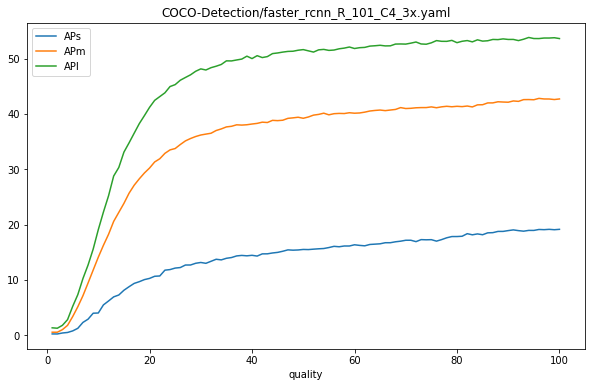

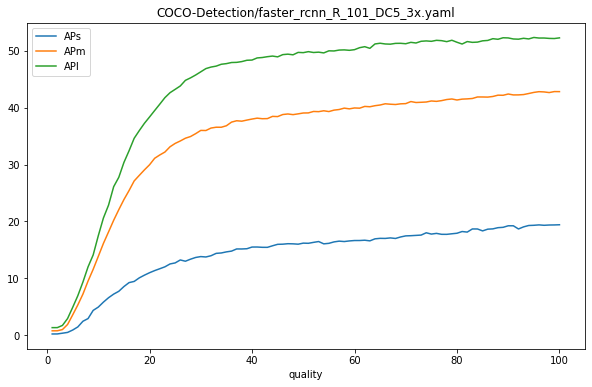

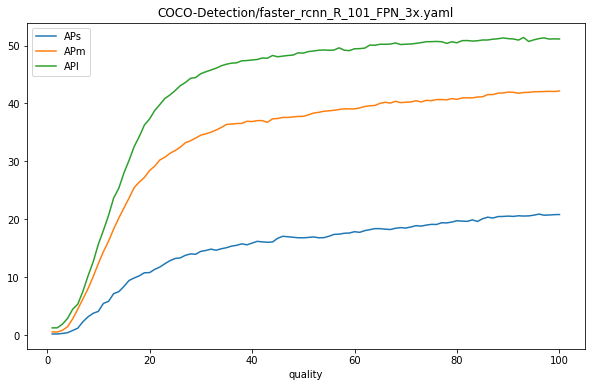

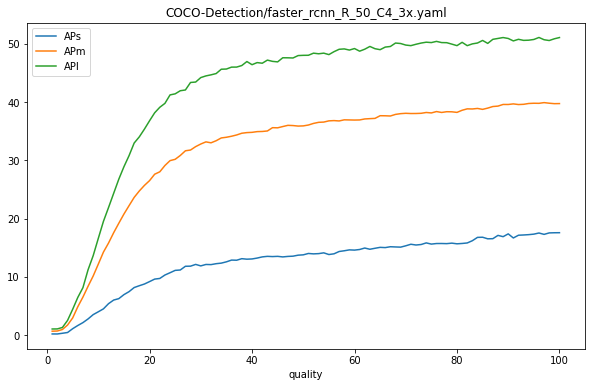

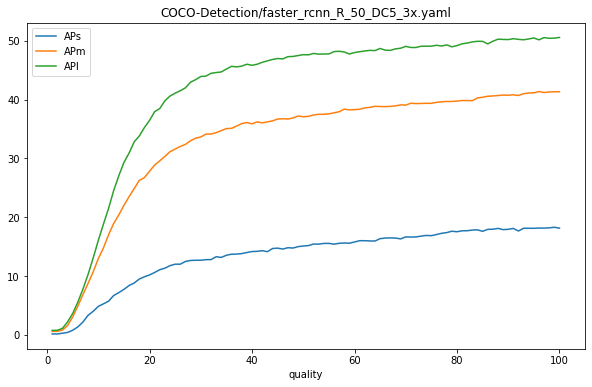

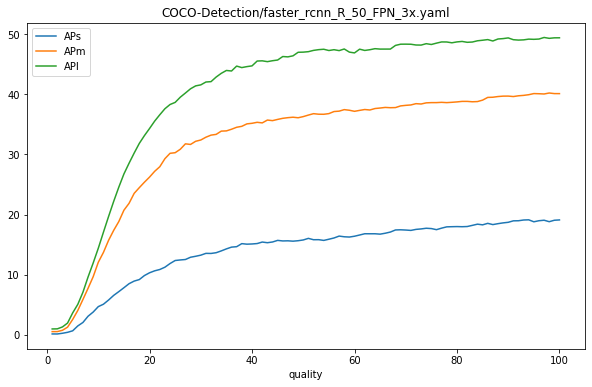

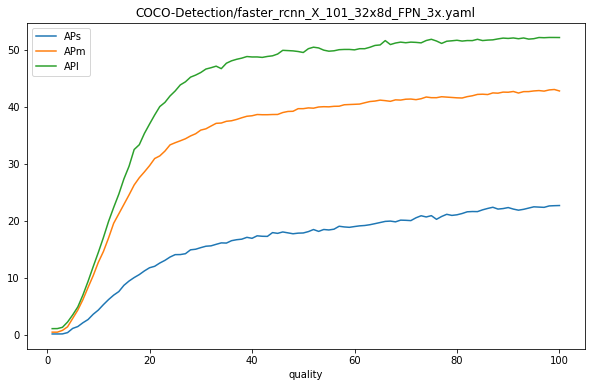

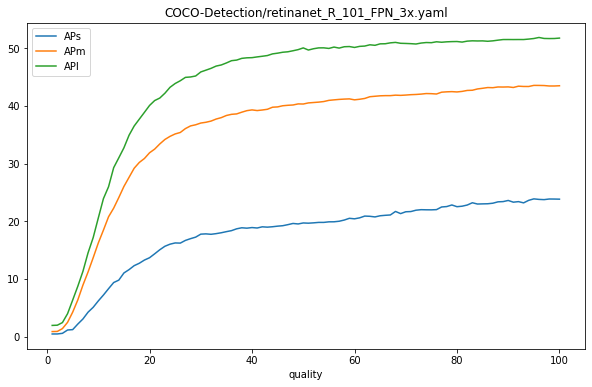

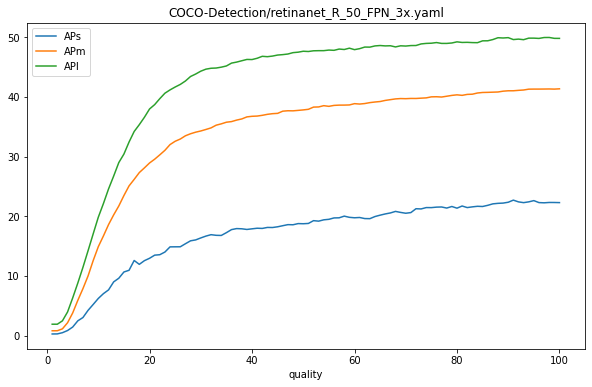

In [17]:
for mc in c_df.model_config.unique():
    ax = c_df[c_df.model_config == mc][['quality', 'APs', 'APm', 'APl']].plot(x='quality')
    ax.set_title(mc)